In [1]:
# only in a Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
pr_table = pd.DataFrame(columns=['classifiers', 'Recall','Precision'])

In [2]:
data = pd.read_csv("value_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FI_ID            3196 non-null   int64  
 1   GENDER           3196 non-null   int64  
 2   AGE              3196 non-null   int64  
 3   EDUCATION        3196 non-null   int64  
 4   ETHGRP           3184 non-null   float64
 5   MARITLST         3196 non-null   int64  
 6   SPARTNER         3196 non-null   int64  
 7   OTHER_IMP        3196 non-null   int64  
 8   OTHER_HH         3196 non-null   int64  
 9   RLTHAPPY         3196 non-null   int64  
 10  SPTIME           3196 non-null   int64  
 11  SPOPEN2          3196 non-null   int64  
 12  SPRELY2          3196 non-null   int64  
 13  SPDEMAND2        3196 non-null   int64  
 14  SPCRITZE2        3196 non-null   int64  
 15  FAMOPEN2         3196 non-null   int64  
 16  FAMRELY2         3196 non-null   int64  
 17  FAMDEMAN2     

In [3]:
data = data.dropna()
data = data[data["ETHGRP"] != 4]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3195
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FI_ID            3111 non-null   int64  
 1   GENDER           3111 non-null   int64  
 2   AGE              3111 non-null   int64  
 3   EDUCATION        3111 non-null   int64  
 4   ETHGRP           3111 non-null   float64
 5   MARITLST         3111 non-null   int64  
 6   SPARTNER         3111 non-null   int64  
 7   OTHER_IMP        3111 non-null   int64  
 8   OTHER_HH         3111 non-null   int64  
 9   RLTHAPPY         3111 non-null   int64  
 10  SPTIME           3111 non-null   int64  
 11  SPOPEN2          3111 non-null   int64  
 12  SPRELY2          3111 non-null   int64  
 13  SPDEMAND2        3111 non-null   int64  
 14  SPCRITZE2        3111 non-null   int64  
 15  FAMOPEN2         3111 non-null   int64  
 16  FAMRELY2         3111 non-null   int64  
 17  FAMDEMAN2     

In [4]:
data = data.drop(["FI_ID","MOCA_SCORE","MOCA_SCORE_CCFM", "EDUCATION", "ETHGRP"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3195
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GENDER       3111 non-null   int64
 1   AGE          3111 non-null   int64
 2   MARITLST     3111 non-null   int64
 3   SPARTNER     3111 non-null   int64
 4   OTHER_IMP    3111 non-null   int64
 5   OTHER_HH     3111 non-null   int64
 6   RLTHAPPY     3111 non-null   int64
 7   SPTIME       3111 non-null   int64
 8   SPOPEN2      3111 non-null   int64
 9   SPRELY2      3111 non-null   int64
 10  SPDEMAND2    3111 non-null   int64
 11  SPCRITZE2    3111 non-null   int64
 12  FAMOPEN2     3111 non-null   int64
 13  FAMRELY2     3111 non-null   int64
 14  FAMDEMAN2    3111 non-null   int64
 15  FAMCRITZ2    3111 non-null   int64
 16  FROPEN2      3111 non-null   int64
 17  FRRELY2      3111 non-null   int64
 18  FRDEMN2      3111 non-null   int64
 19  FRCRITZ2     3111 non-null   int64
 20  FRAMT   

In [5]:
data.describe()

,GENDER,AGE,MARITLST,SPARTNER,OTHER_IMP,OTHER_HH,RLTHAPPY,SPTIME,SPOPEN2,SPRELY2,...,FRRELY2,FRDEMN2,FRCRITZ2,FRAMT,PAR_NERVE,FAM_NERVE,FR_NERVE,PAR_THREAT,FAMFRTHREAT,IMPAIRED
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,...,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000
mean,1.527162,73.171006,2.204436,-2.022179,0.480874,0.144327,3.721311,0.364834,1.083574,1.189650,...,2.000643,0.460945,0.369013,3.202507,-0.385085,0.409836,0.218901,-1.134041,-0.539376,0.486339
std,0.499342,7.348579,1.772964,1.456273,0.512422,0.354211,4.330234,2.177118,2.593727,2.643448,...,1.190260,0.787565,0.951623,1.512055,2.273903,2.253290,2.149847,1.606368,1.790016,0.499894
min,1.000000,62.000000,1.000000,-3.000000,-2.000000,-2.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-4.000000,-5.000000,-5.000000,-4.000000,-5.000000,0.000000
25%,1.000000,67.000000,1.000000,-3.000000,0.000000,0.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,2.000000,0.000000,0.000000,2.000000,-3.000000,0.000000,0.000000,-3.000000,0.000000,0.000000
50%,2.000000,72.000000,1.000000,-3.000000,0.000000,0.000000,6.000000,1.000000,3.000000,3.000000,...,2.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,79.000000,4.000000,0.000000,1.000000,0.000000,7.000000,2.000000,3.000000,3.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,2.000000,91.000000,6.000000,1.000000,1.000000,1.000000,7.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000


In [6]:
data['IMPAIRED'].value_counts()

0    1598
1    1513
Name: IMPAIRED, dtype: int64

In [7]:
corr_matrix = data.corr()
corr_matrix["IMPAIRED"].sort_values(ascending=False)

IMPAIRED       1.000000
AGE            0.186726
MARITLST       0.132307
SPARTNER       0.131429
OTHER_HH       0.130082
GENDER         0.003097
FAMOPEN2      -0.007227
FAMCRITZ2     -0.036089
FAMRELY2      -0.051008
OTHER_IMP     -0.068491
FAMDEMAN2     -0.075616
FRDEMN2       -0.086091
FRCRITZ2      -0.107010
FROPEN2       -0.107264
FAMFRTHREAT   -0.111008
SPDEMAND2     -0.113681
PAR_THREAT    -0.122608
FAM_NERVE     -0.123057
RLTHAPPY      -0.123490
FR_NERVE      -0.124524
SPOPEN2       -0.124851
SPCRITZE2     -0.125209
SPTIME        -0.127927
SPRELY2       -0.129436
PAR_NERVE     -0.139842
FRAMT         -0.153310
FRRELY2       -0.166971
Name: IMPAIRED, dtype: float64

<AxesSubplot:>

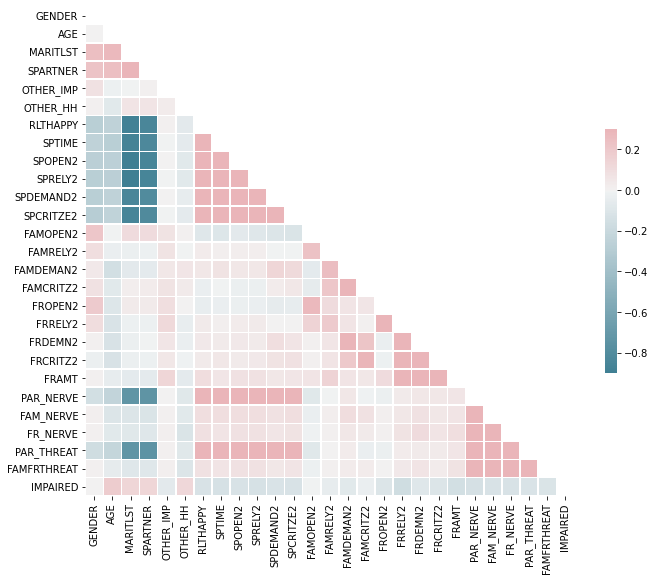

In [8]:
import seaborn as sns
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## ORIGINAL DATASET WITH ALL FEATURES

In [9]:

x = data.drop("IMPAIRED", axis=1, inplace=False) #.copy()
y = data["IMPAIRED"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42, stratify=y)

In [10]:
import statsmodels.api as sm
#x = sm.add_constant(x)
logit_mod=sm.Logit(y,x)
result=logit_mod.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.639196
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               IMPAIRED   No. Observations:                 3111
Model:                          Logit   Df Residuals:                     3085
Method:                           MLE   Df Model:                           25
Date:                Tue, 13 Apr 2021   Pseudo R-squ.:                 0.07734
Time:                        15:35:12   Log-Likelihood:                -1988.5
converged:                       True   LL-Null:                       -2155.2
Covariance Type:            nonrobust   LLR p-value:                 1.143e-55
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
GENDER         -0.0113      0.083     -0.137      0.891      -0.173       0.151
AGE             0.0341    

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 0.95186436,  0.52266095, -0.68053313, ...,  0.35114412,
         0.70169721,  0.28532136],
       [-1.05056986,  0.25041982, -0.68053313, ...,  0.82522932,
         1.95136101,  1.42416605],
       [-1.05056986,  0.65878151, -0.68053313, ...,  0.82522932,
         0.70169721,  0.28532136],
       ...,
       [-1.05056986,  1.61162544, -0.68053313, ...,  0.35114412,
         0.70169721,  0.28532136],
       [ 0.95186436, -0.56630354, -0.68053313, ...,  0.35114412,
         0.70169721,  0.28532136],
       [ 0.95186436,  1.33938431,  1.56751472, ...,  0.35114412,
        -1.1727985 ,  0.28532136]])

### KNN Model

In [12]:
# CV for KNN, to understnad whether model is overfitted
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=5, scoring = "roc_auc")
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.60469897 0.63107562 0.61839207 0.60411406 0.62083203]
cv_scores mean:0.6158225505194797
ROC AUC: 0.62 (+/- 0.01)


In [13]:
# predictions with CV fitted model
knn_cv.fit(x_train, y_train)
y_pred = knn_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':knn_cv.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':knn_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)
#pr_table.set_index('classifiers', inplace=True)

[[284 116]
 [193 185]]
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       400
           1       0.61      0.49      0.54       378

    accuracy                           0.60       778
   macro avg       0.61      0.60      0.60       778
weighted avg       0.60      0.60      0.60       778

0.5997089947089946


In [14]:

#create new a knn model
knn = KNeighborsClassifier() 
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
grid_search = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [15]:
grid_search.best_params_

{'n_neighbors': 15}

In [16]:
#prediction with best param
final_model = grid_search.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[310  90]
 [215 163]]
              precision    recall  f1-score   support

           0       0.59      0.78      0.67       400
           1       0.64      0.43      0.52       378

    accuracy                           0.61       778
   macro avg       0.62      0.60      0.59       778
weighted avg       0.62      0.61      0.60       778



0.6031084656084656

### SVM Model

In [17]:
svc_cv = SVC(kernel='rbf', gamma= 'auto')
cv_scores = cross_val_score(svc_cv, x_train, y_train, cv=5, scoring = "roc_auc")
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.67358664 0.68491189 0.66009545 0.65255378 0.67083848]
cv_scores mean:0.6683972468496365
ROC AUC: 0.67 (+/- 0.01)


In [18]:
# predictions with CV fitted model of SVM
svc_cv.fit(x_train, y_train)
y_pred = svc_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':svc_cv.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':svc_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)
#result_table.set_index('classifiers', inplace=True)

[[285 115]
 [166 212]]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       400
           1       0.65      0.56      0.60       378

    accuracy                           0.64       778
   macro avg       0.64      0.64      0.64       778
weighted avg       0.64      0.64      0.64       778

0.6366732804232804


In [19]:
from sklearn.model_selection import GridSearchCV 
svc = SVC() 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_search = GridSearchCV(svc, param_grid, cv=5) 
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [20]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [21]:
#prediction with best param
final_model = grid_search.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[289 111]
 [169 209]]
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       400
           1       0.65      0.55      0.60       378

    accuracy                           0.64       778
   macro avg       0.64      0.64      0.64       778
weighted avg       0.64      0.64      0.64       778



0.6377050264550265

### Random Forest Model

In [22]:
rf_cv = RandomForestClassifier(max_depth=20, max_features=20, n_estimators=1000)
cv_scores = cross_val_score(rf_cv, x_train, y_train, cv=5,scoring = "roc_auc")
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.69038179 0.69140051 0.68555433 0.69416438 0.65539233]
cv_scores mean:0.6833786687679329
ROC AUC: 0.68 (+/- 0.01)


In [23]:
# predictions with CV fitted model of RF

rf_cv.fit(x_train, y_train)
y_pred = rf_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':rf_cv.__class__.__name__,
                                    'fpr':fpr, 
                                   'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':rf_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)



[[271 129]
 [153 225]]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       400
           1       0.64      0.60      0.61       378

    accuracy                           0.64       778
   macro avg       0.64      0.64      0.64       778
weighted avg       0.64      0.64      0.64       778

0.6363690476190477


In [24]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': [2, 4, 6, 8, 10, 15],
    'n_estimators': [50, 100, 150, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(rf,param_grid, cv = 5)
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30, 40, 50],
                         'max_features': [2, 4, 6, 8, 10, 15],
                         'n_estimators': [50, 100, 150, 200, 300]})

In [25]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 6, 'n_estimators': 200}

In [26]:
#prediction with best param
final_model = grid_search.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[291 109]
 [167 211]]
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       400
           1       0.66      0.56      0.60       378

    accuracy                           0.65       778
   macro avg       0.65      0.64      0.64       778
weighted avg       0.65      0.65      0.64       778



0.6428505291005291

In [27]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [28]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(x_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(x_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [29]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')


Best params for recall_score
{'max_depth': 25, 'max_features': 20, 'min_samples_split': 5, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       275       125
pos       148       230


In [30]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
24,0.677,0.535,0.649,5,3,3,100
30,0.673,0.549,0.650,5,5,3,100
28,0.670,0.552,0.651,5,3,10,100
39,0.670,0.564,0.652,5,10,5,300
38,0.670,0.573,0.653,5,10,5,100


In [31]:
#prediction with best param
final_model = grid_search_clf.best_estimator_
y_pred = final_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

[[275 125]
 [148 230]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       400
           1       0.65      0.61      0.63       378

    accuracy                           0.65       778
   macro avg       0.65      0.65      0.65       778
weighted avg       0.65      0.65      0.65       778



0.6479828042328042

In [32]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = KNeighborsClassifier()
estimators.append(('KNN', model1))
model2 = SVC(kernel='rbf', gamma= 'auto')
estimators.append(('SVC', model2))
model3 = RandomForestClassifier()
estimators.append(('RF', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, x_train, y_train, cv=kfold)
print(results.mean())

0.6343567734125675


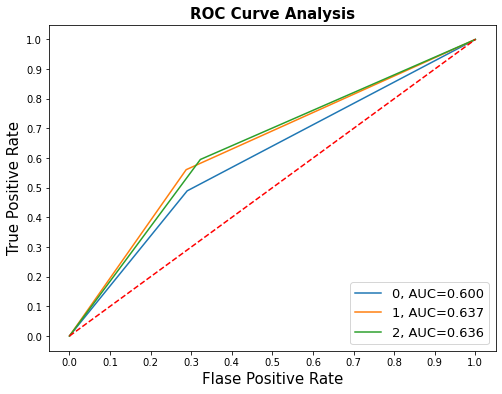

In [33]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='red', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

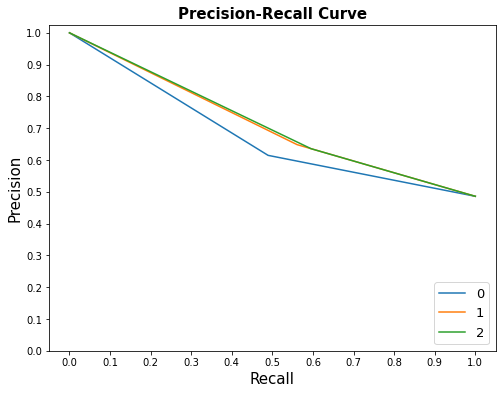

In [34]:
fig = plt.figure(figsize=(8,6))

for i in pr_table.index:
    plt.plot(pr_table.loc[i]['Recall'], 
             pr_table.loc[i]['Precision'],label="{}".format(i))
    
# for i in result_table.index:
#     plt.plot(result_table.loc[i]['fpr'], 
#              result_table.loc[i]['tpr'], 
#              label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
    
    #plt.plot([0,1], [0,1], color='red', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision-Recall Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Random Forest feature importance
Feature: GENDER, Score: 0.02281
Feature: AGE, Score: 0.14784
Feature: MARITLST, Score: 0.02240
Feature: SPARTNER, Score: 0.00607
Feature: OTHER_IMP, Score: 0.02513
Feature: OTHER_HH, Score: 0.02158
Feature: RLTHAPPY, Score: 0.02850
Feature: SPTIME, Score: 0.03436
Feature: SPOPEN2, Score: 0.01681
Feature: SPRELY2, Score: 0.01258
Feature: SPDEMAND2, Score: 0.03579
Feature: SPCRITZE2, Score: 0.03893
Feature: FAMOPEN2, Score: 0.04306
Feature: FAMRELY2, Score: 0.03220
Feature: FAMDEMAN2, Score: 0.04434
Feature: FAMCRITZ2, Score: 0.04786
Feature: FROPEN2, Score: 0.04960
Feature: FRRELY2, Score: 0.05456
Feature: FRDEMN2, Score: 0.03332
Feature: FRCRITZ2, Score: 0.04242
Feature: FRAMT, Score: 0.06862
Feature: PAR_NERVE, Score: 0.03370
Feature: FAM_NERVE, Score: 0.04833
Feature: FR_NERVE, Score: 0.05369
Feature: PAR_THREAT, Score: 0.01615
Feature: FAMFRTHREAT, Score: 0.01936


<AxesSubplot:>

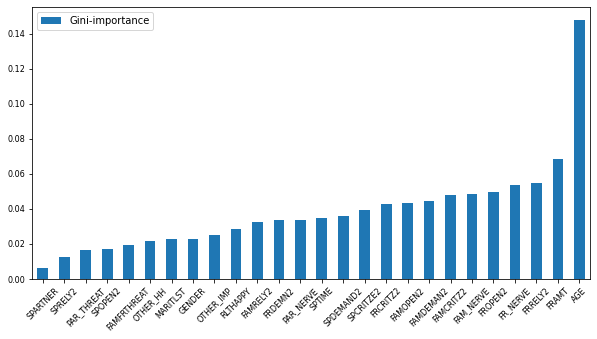

In [35]:
print("Random Forest feature importance")

model = rf_cv
for feature, importance in zip(data.columns, model.feature_importances_):
	print('Feature: %0s, Score: %.5f' % (feature,importance))
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(data.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', fontsize = 8, rot=45)

## Choose the top 10 important features 

In [36]:
def algorithm_pipeline(x_train, x_test, y_train, y_test, 
                       model, param_grid, cv=5):
#     scorers = {
#     'recall_score': make_scorer(recall_score,pos_label=1,greater_is_better=True),
#     'accuracy_score': make_scorer(accuracy_score)
#     }
    
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=make_scorer(recall_score,pos_label=1,greater_is_better=True),
        verbose=2,
#         refit=scoring_fit
    )
    fitted_model = gs.fit(x_train, y_train)
    print(gs.best_params_)
    
    final_model = gs.best_estimator_
    y_pred = final_model.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    return final_model

In [37]:
importances_sort =importances.sort_values(by='Gini-importance')

In [38]:
ss=importances_sort.index[-10:]

In [39]:
data_top10_important_feature= data[ss]

In [40]:
data_top10_important_feature.head()

,FRCRITZ2,FAMOPEN2,FAMDEMAN2,FAMCRITZ2,FAM_NERVE,FROPEN2,FR_NERVE,FRRELY2,FRAMT,AGE
0,-2,3,2,2,2,1,1,0,5,67
1,1,2,1,3,0,0,0,2,3,84
2,1,3,2,1,2,2,1,3,2,65
3,0,1,0,0,1,1,1,3,5,65
4,0,3,0,1,0,3,0,3,3,70


In [41]:
x = data_top10_important_feature
y = data["IMPAIRED"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42, stratify=y)

### KNN MODEL

In [42]:
# CV for KNN, to understnad whether model is overfitted
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=5, scoring = "roc_auc")
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.62774413 0.6306351  0.58784875 0.59073231 0.62848137]
cv_scores mean:0.6130883315208375
ROC AUC: 0.61 (+/- 0.02)


In [43]:
# predictions with CV fitted model
knn_cv.fit(x_train, y_train)
y_pred = knn_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':knn_cv.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':knn_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)
#pr_table.set_index('classifiers', inplace=True)

[[282 118]
 [183 195]]
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       400
           1       0.62      0.52      0.56       378

    accuracy                           0.61       778
   macro avg       0.61      0.61      0.61       778
weighted avg       0.61      0.61      0.61       778

0.6104365079365079


In [44]:
#create new a knn model
knn = KNeighborsClassifier() 
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

In [45]:
algorithm_pipeline(x_train, x_test, y_train, y_test,knn, param_grid, cv=5)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s


{'n_neighbors': 3}
[[270 130]
 [176 202]]
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       400
           1       0.61      0.53      0.57       378

    accuracy                           0.61       778
   macro avg       0.61      0.60      0.60       778
weighted avg       0.61      0.61      0.60       778

0.6046957671957672


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.0s finished


KNeighborsClassifier(n_neighbors=3)

### SVM MODEL

In [46]:
svc_cv = SVC(kernel='rbf', gamma= 'auto')
cv_scores = cross_val_score(svc_cv, x_train, y_train, cv=5, scoring = "roc_auc")
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.64935756 0.66773128 0.67204479 0.66395407 0.66761285]
cv_scores mean:0.6641401089955087
ROC AUC: 0.66 (+/- 0.01)


In [47]:
# predictions with CV fitted model of SVM
svc_cv.fit(x_train, y_train)
y_pred = svc_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':svc_cv.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':svc_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)
#result_table.set_index('classifiers', inplace=True)

[[283 117]
 [166 212]]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       400
           1       0.64      0.56      0.60       378

    accuracy                           0.64       778
   macro avg       0.64      0.63      0.63       778
weighted avg       0.64      0.64      0.63       778

0.6341732804232805


In [48]:
from sklearn.model_selection import GridSearchCV 
svc = SVC() 
# defining parameter range 
param_grid = {'C': [0.1,0.2,0.3,0.4,0.5,1,2],  
              'gamma': [0.1,0.2,0.3,0.35,0.4,0.5], 
              'kernel': ['rbf']}  

In [49]:
algorithm_pipeline(x_train, x_test, y_train, y_test,svc, param_grid, cv=5)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    9.3s finished


{'C': 0.3, 'gamma': 0.4, 'kernel': 'rbf'}
[[165 235]
 [ 84 294]]
              precision    recall  f1-score   support

           0       0.66      0.41      0.51       400
           1       0.56      0.78      0.65       378

    accuracy                           0.59       778
   macro avg       0.61      0.60      0.58       778
weighted avg       0.61      0.59      0.58       778

0.5951388888888889


SVC(C=0.3, gamma=0.4)

### RANDOM FOREST TREE MODEL

In [50]:
rf_cv = RandomForestClassifier(max_depth=20, max_features=10, n_estimators=1000)
cv_scores = cross_val_score(rf_cv, x_train, y_train, cv=5,scoring = "roc_auc")
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.66546439 0.67265051 0.6530011  0.66877408 0.66648849]
cv_scores mean:0.6652757143998181
ROC AUC: 0.67 (+/- 0.01)


In [51]:
# predictions with CV fitted model of RF

rf_cv.fit(x_train, y_train)
y_pred = rf_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':rf_cv.__class__.__name__,
                                    'fpr':fpr, 
                                   'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':rf_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)

[[276 124]
 [152 226]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.67       400
           1       0.65      0.60      0.62       378

    accuracy                           0.65       778
   macro avg       0.65      0.64      0.64       778
weighted avg       0.65      0.65      0.64       778

0.6439417989417989


In [52]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [300],
    'max_features': [6],
    'n_estimators': [150]
}
# Create a based model
rf = RandomForestClassifier()

In [53]:
algorithm_pipeline(x_train, x_test, y_train, y_test,rf, param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


{'bootstrap': True, 'max_depth': 300, 'max_features': 6, 'n_estimators': 150}
[[284 116]
 [156 222]]
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       400
           1       0.66      0.59      0.62       378

    accuracy                           0.65       778
   macro avg       0.65      0.65      0.65       778
weighted avg       0.65      0.65      0.65       778

0.6486507936507937


RandomForestClassifier(max_depth=300, max_features=6, n_estimators=150)

### XG-Boost Model

In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':'XG-Boost',
                                    'fpr':fpr, 
                                   'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':'XG-Boost',
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)

[[272 128]
 [168 210]]
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       400
           1       0.62      0.56      0.59       378

    accuracy                           0.62       778
   macro avg       0.62      0.62      0.62       778
weighted avg       0.62      0.62      0.62       778

0.6177777777777778


In [56]:
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

xgb = XGBClassifier()

In [57]:
algorithm_pipeline(x_train, x_test, y_train, y_test,xgb, param_grid, cv=5)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 34.5min finished
C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_

[16:25:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.2, 'reg_lambda': 1.1, 'subsample': 0.9}
[[264 136]
 [147 231]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       400
           1       0.63      0.61      0.62       378

    accuracy                           0.64       778
   macro avg       0.64      0.64      0.64       778
weighted avg       0.64      0.64      0.64       778

0.6355555555555555


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=1.2, reg_lambda=1.1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

###  Build Gradient Boosting Model

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':'GBM',
                                    'fpr':fpr, 
                                   'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':'GBM',
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)

[[272 128]
 [162 216]]
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       400
           1       0.63      0.57      0.60       378

    accuracy                           0.63       778
   macro avg       0.63      0.63      0.63       778
weighted avg       0.63      0.63      0.63       778

0.6257142857142857


In [60]:
param_grid = {
    'n_estimators': [100,200, 300, 400],
    'learning_rate': [0.5,0.8,1,1.2],
    'max_depth': [3,5,10,15],
    'random_state': [0, 1]
}

clf = GradientBoostingClassifier()

In [61]:
algorithm_pipeline(x_train, x_test, y_train, y_test,clf, param_grid, cv=5)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  4.2min finished


{'learning_rate': 1.2, 'max_depth': 5, 'n_estimators': 100, 'random_state': 1}
[[249 151]
 [169 209]]
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       400
           1       0.58      0.55      0.57       378

    accuracy                           0.59       778
   macro avg       0.59      0.59      0.59       778
weighted avg       0.59      0.59      0.59       778

0.5877050264550265


GradientBoostingClassifier(learning_rate=1.2, max_depth=5, random_state=1)

## Choose the feature which has P-value<0.05
    -Coefficients having p-values less than alpha are statistically significant.  For example, if you chose alpha to be 0.05, coefficients having a p-value of 0.05 or less would be statistically significant (i.e., you can reject the null hypothesis and say that the coefficient is significantly different from 0)

In [62]:
data_95_important_feature= data[["AGE",
"MARITLST",
"SPARTNER",
"OTHER_IMP",
"OTHER_HH",
"FAMDEMAN2",
"FROPEN2",
"FRRELY2",
"FRCRITZ2",
"FRAMT",
"PAR_THREAT"]]


In [63]:
data_95_important_feature.head()

,AGE,MARITLST,SPARTNER,OTHER_IMP,OTHER_HH,FAMDEMAN2,FROPEN2,FRRELY2,FRCRITZ2,FRAMT,PAR_THREAT
0,67,2,-3,0,0,2,1,0,-2,5,0
1,84,5,0,1,0,1,0,2,1,3,-3
2,65,1,-3,1,1,2,2,3,1,2,0
3,65,1,-3,0,0,0,1,3,0,5,0
4,70,1,-3,1,0,0,3,3,0,3,0


In [64]:
x = data_95_important_feature
y = data["IMPAIRED"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42, stratify=y)

### KNN MODEL

In [65]:
# CV for KNN, to understnad whether model is overfitted
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=5, scoring = "roc_auc")
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.60354258 0.59401615 0.60263399 0.59321144 0.59154332]
cv_scores mean:0.5969894982765931
ROC AUC: 0.60 (+/- 0.01)


In [66]:
# predictions with CV fitted model
knn_cv.fit(x_train, y_train)
y_pred = knn_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':knn_cv.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':knn_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)
#pr_table.set_index('classifiers', inplace=True)

[[271 129]
 [184 194]]
              precision    recall  f1-score   support

           0       0.60      0.68      0.63       400
           1       0.60      0.51      0.55       378

    accuracy                           0.60       778
   macro avg       0.60      0.60      0.59       778
weighted avg       0.60      0.60      0.59       778

0.5953637566137566


In [67]:
#create new a knn model
knn = KNeighborsClassifier() 
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

In [68]:
algorithm_pipeline(x_train, x_test, y_train, y_test,knn, param_grid, cv=5)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


{'n_neighbors': 7}
[[264 136]
 [191 187]]
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       400
           1       0.58      0.49      0.53       378

    accuracy                           0.58       778
   macro avg       0.58      0.58      0.58       778
weighted avg       0.58      0.58      0.58       778

0.5773544973544973


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.6s finished


KNeighborsClassifier(n_neighbors=7)

### SVM MODEL

In [69]:
svc_cv = SVC(kernel='rbf', gamma= 'auto')
cv_scores = cross_val_score(svc_cv, x_train, y_train, cv=5, scoring = "roc_auc")
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.65723201 0.66748348 0.63277349 0.6460933  0.66234125]
cv_scores mean:0.6531847086797044
ROC AUC: 0.65 (+/- 0.01)


In [70]:
# predictions with CV fitted model of SVM
svc_cv.fit(x_train, y_train)
y_pred = svc_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':svc_cv.__class__.__name__,
                                    'fpr':fpr, 
                                    'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':svc_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)
#result_table.set_index('classifiers', inplace=True)

[[265 135]
 [168 210]]
              precision    recall  f1-score   support

           0       0.61      0.66      0.64       400
           1       0.61      0.56      0.58       378

    accuracy                           0.61       778
   macro avg       0.61      0.61      0.61       778
weighted avg       0.61      0.61      0.61       778

0.6090277777777777


In [71]:
from sklearn.model_selection import GridSearchCV 
svc = SVC() 
# defining parameter range 
param_grid = {'C': [0.12],  
              'gamma': [0.27], 
              'kernel': ['rbf']}    

In [72]:
algorithm_pipeline(x_train, x_test, y_train, y_test,svc, param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'C': 0.12, 'gamma': 0.27, 'kernel': 'rbf'}
[[147 253]
 [ 73 305]]
              precision    recall  f1-score   support

           0       0.67      0.37      0.47       400
           1       0.55      0.81      0.65       378

    accuracy                           0.58       778
   macro avg       0.61      0.59      0.56       778
weighted avg       0.61      0.58      0.56       778

0.5871891534391535


SVC(C=0.12, gamma=0.27)

### RANDOM FOREST TREE MODEL

In [73]:
rf_cv = RandomForestClassifier(max_depth=20, max_features=10, n_estimators=1000)
cv_scores = cross_val_score(rf_cv, x_train, y_train, cv=5,scoring = "roc_auc")
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
print("ROC AUC: %0.2f (+/- %0.2f)"
          % (cv_scores.mean(), cv_scores.std()))

[0.65523128 0.63638032 0.62683554 0.63478517 0.61415959]
cv_scores mean:0.6334783790758115
ROC AUC: 0.63 (+/- 0.01)


In [74]:
# predictions with CV fitted model of RF

rf_cv.fit(x_train, y_train)
y_pred = rf_cv.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':rf_cv.__class__.__name__,
                                    'fpr':fpr, 
                                   'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':rf_cv.__class__.__name__,
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)


[[250 150]
 [152 226]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       400
           1       0.60      0.60      0.60       378

    accuracy                           0.61       778
   macro avg       0.61      0.61      0.61       778
weighted avg       0.61      0.61      0.61       778

0.611441798941799


In [75]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': [2, 4, 6, 8, 10, 15],
    'n_estimators': [50, 100, 150, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()

In [76]:
algorithm_pipeline(x_train, x_test, y_train, y_test,rf, param_grid, cv=5)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   57.1s finished


{'bootstrap': True, 'max_depth': 40, 'max_features': 10, 'n_estimators': 100}
[[242 158]
 [156 222]]
              precision    recall  f1-score   support

           0       0.61      0.60      0.61       400
           1       0.58      0.59      0.59       378

    accuracy                           0.60       778
   macro avg       0.60      0.60      0.60       778
weighted avg       0.60      0.60      0.60       778

0.5961507936507937


RandomForestClassifier(max_depth=40, max_features=10)

### Build XG-Boost Model

In [77]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

[16:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [78]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':'XG-Boost',
                                    'fpr':fpr, 
                                   'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':'XG-Boost',
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)

[[256 144]
 [164 214]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       400
           1       0.60      0.57      0.58       378

    accuracy                           0.60       778
   macro avg       0.60      0.60      0.60       778
weighted avg       0.60      0.60      0.60       778

0.6030687830687831


In [79]:
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

xgb = XGBClassifier()

In [80]:
algorithm_pipeline(x_train, x_test, y_train, y_test,xgb, param_grid, cv=5)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 41.0min finished
C:\Users\yhy01\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_

[17:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'subsample': 0.7}
[[247 153]
 [154 224]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       400
           1       0.59      0.59      0.59       378

    accuracy                           0.61       778
   macro avg       0.61      0.61      0.61       778
weighted avg       0.61      0.61      0.61       778

0.6050462962962962


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=1.2, reg_lambda=1.2, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Build Gradient Boosting Model

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [82]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test,  y_pred)
    
result_table = result_table.append({'classifiers':'Gradient-Boost',
                                    'fpr':fpr, 
                                   'tpr':tpr, 
                                    'auc':auc}, ignore_index=True)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_table = pr_table.append({'classifiers':'Gradient-Boost',
                                    'Recall':recall, 
                                    'Precision':precision}, ignore_index=True)

[[272 128]
 [147 231]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       400
           1       0.64      0.61      0.63       378

    accuracy                           0.65       778
   macro avg       0.65      0.65      0.65       778
weighted avg       0.65      0.65      0.65       778

0.6455555555555554


In [83]:
param_grid = {
    'n_estimators': [100,200, 300, 400],
    'learning_rate': [0.5,0.8,1,1.2],
    'max_depth': [3,5,10,15],
    'random_state': [0, 1]
}

clf = GradientBoostingClassifier()

In [84]:
algorithm_pipeline(x_train, x_test, y_train, y_test,clf, param_grid, cv=5)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  5.1min finished


{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100, 'random_state': 1}
[[265 135]
 [170 208]]
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       400
           1       0.61      0.55      0.58       378

    accuracy                           0.61       778
   macro avg       0.61      0.61      0.61       778
weighted avg       0.61      0.61      0.61       778

0.6063822751322752


GradientBoostingClassifier(learning_rate=0.5, random_state=1)

In [85]:
result_table

,classifiers,fpr,tpr,auc
0,KNeighborsClassifier,"[0.0, 0.29, 1.0]","[0.0, 0.4894179894179894, 1.0]",0.599709
1,SVC,"[0.0, 0.2875, 1.0]","[0.0, 0.5608465608465608, 1.0]",0.636673
2,RandomForestClassifier,"[0.0, 0.3225, 1.0]","[0.0, 0.5952380952380952, 1.0]",0.636369
3,KNeighborsClassifier,"[0.0, 0.295, 1.0]","[0.0, 0.5158730158730159, 1.0]",0.610437
4,SVC,"[0.0, 0.2925, 1.0]","[0.0, 0.5608465608465608, 1.0]",0.634173
5,RandomForestClassifier,"[0.0, 0.31, 1.0]","[0.0, 0.5978835978835979, 1.0]",0.643942
6,XG-Boost,"[0.0, 0.32, 1.0]","[0.0, 0.5555555555555556, 1.0]",0.617778
7,GBM,"[0.0, 0.32, 1.0]","[0.0, 0.5714285714285714, 1.0]",0.625714
8,KNeighborsClassifier,"[0.0, 0.3225, 1.0]","[0.0, 0.5132275132275133, 1.0]",0.595364
9,SVC,"[0.0, 0.3375, 1.0]","[0.0, 0.5555555555555556, 1.0]",0.609028
